# Weather Classification using Decision Tree
assignment with EDA, training & evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Load Data

In [3]:
df = pd.read_csv('Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Data Info

In [4]:
print(df.shape)
df.info()

(8784, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


### Class Distribution

In [5]:
df['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

### Train Test Split

In [7]:
X = df.drop(['Weather','Date/Time'], axis=1)
y = df['Weather']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Train Decision Trees

In [8]:
depths = list(range(1,10)) + [None]
train_scores = []
test_scores = []
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))
pd.DataFrame({'Depth':depths,'Train Accuracy':train_scores,'Test Accuracy':test_scores})

,Depth,Train Accuracy,Test Accuracy
0,1.0,0.270670,0.267501
1,2.0,0.312936,0.295390
2,3.0,0.330582,0.330677
3,4.0,0.378255,0.384178
4,5.0,0.397182,0.374502
5,6.0,0.425929,0.400114
6,7.0,0.451829,0.409220
7,8.0,0.492244,0.429141
8,9.0,0.536787,0.424587
9,NaN,1.000000,0.450768


### Plot Accuracy

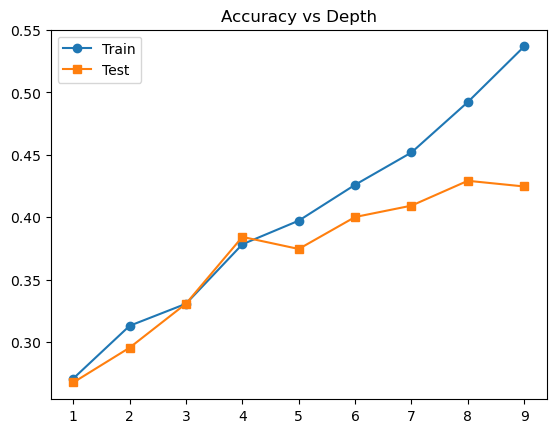

In [9]:
plt.plot(depths, train_scores, marker='o', label='Train')
plt.plot(depths, test_scores, marker='s', label='Test')
plt.legend(); plt.title('Accuracy vs Depth'); plt.show()